In [68]:
# Import BeautifulSoup
from bs4 import BeautifulSoup
import requests

In [70]:
# Gather html
url = 'https://www.ncaa.com/news/basketball-women/article/2025-04-06/2025-march-madness-womens-ncaa-tournament-schedule-dates-times'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

In [71]:
# Locate table of interest in html
ncaa_champions_history = soup.find_all('table')[2]

In [74]:
# Scrape the table headers
history_titles = ncaa_champions_history.find_all('th')
history_titles = [title.text.strip() for title in history_titles] 

In [76]:
# Import pandas and add headers to dataframe
import pandas as pd
df = pd.DataFrame(columns = history_titles)

In [78]:
column_data = ncaa_champions_history.find_all('tr')

In [80]:
# Clean up data and put into dataframe
for row in column_data[1:]: 
    row_data = row.find_all('td')
    individual_row_data= [data.text.strip() for data in row_data]

    length = len(df)
    df.loc[length] = individual_row_data

In [117]:
# Print data frame to check
df

,YEAR,CHAMPION (RECORD),COACH,SCORE,RUNNER-UP,SITE,CHAMPION,RECORD,OT
0,2024,South Carolina (38-0),Dawn Staley,87-75,Iowa,"Cleveland, Ohio",South Carolina,38-0,None
1,2023,LSU (34-2),Kim Mulkey,102-85,Iowa,"Dallas, Texas",LSU,34-2,None
2,2022,South Carolina (36-2),Dawn Staley,64-49,Connecticut,"Minneapolis, Minn.",South Carolina,36-2,None
3,2021,Stanford (31-2),Tara VanderVeer,54-53,Arizona,"San Antonio, Texas",Stanford,31-2,None
4,2019,Baylor (37-1),Kim Mulkey,82-81,Notre Dame,"Tampa, Fla.",Baylor,37-1,None
5,2018,Notre Dame (34-3),Muffet McGraw,61-58,Mississippi State,"Columbus, Ohio",Notre Dame,34-3,None
6,2017,South Carolina (33-4),Dawn Staley,67-55,Mississippi State,"Dallas, Texas",South Carolina,33-4,None
7,2016,Connecticut (38-0),Geno Auriemma,82-51,Syracuse,"Indianapolis, Ind.",Connecticut,38-0,None
8,2015,Connecticut (38-1),Geno Auriemma,63-53,Notre Dame,"Tampa, Fla.",Connecticut,38-1,None
9,2014,Connecticut (40-0),Geno Auriemma,79-58,Notre Dame,"Nashville, Tenn.",Connecticut,40-0,None


In [84]:
#Split Champion and Record
df[['CHAMPION','RECORD']] = df['CHAMPION (RECORD)'].str.split('(',n=1,expand=True)

In [86]:
#Trim closing parenthesis from Record
df['RECORD'] = df['RECORD'].str.strip(')')

In [88]:
#Split Score and OT
df[['SCORE','OT']] = df['SCORE'].str.split('(',n=1,expand=True)

In [90]:
#Trim closing parenthesis from OT
df['OT'] = df['OT'].str.strip(')')

In [121]:
df_championships = df['CHAMPION'].value_counts()

In [127]:
df_championships

CHAMPION
Connecticut             11
Tennessee                8
South Carolina           3
Stanford                 3
Baylor                   3
Notre Dame               2
Louisiana Tech           2
Southern California      2
LSU                      1
Texas A&M                1
Maryland                 1
Purdue                   1
North Carolina           1
Texas Tech               1
Texas                    1
Old Dominion             1
Name: count, dtype: int64

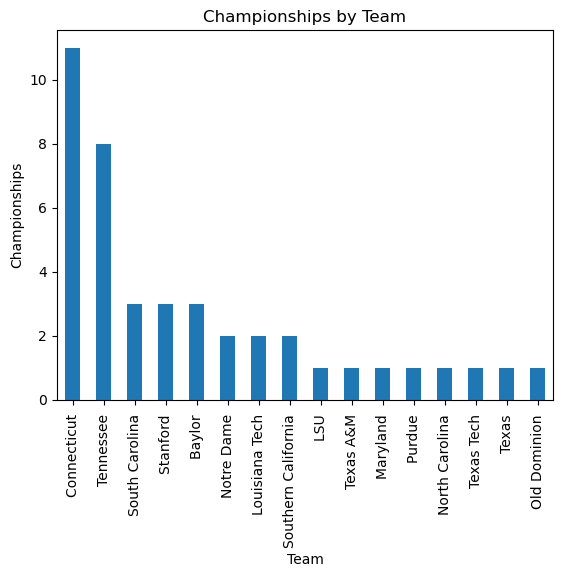

In [131]:
df_championships.plot.bar()

# Add labels and title
plt.xlabel('Team')
plt.ylabel('Championships')
plt.title('Championships by Team')

# Display the plot
plt.show()

In [21]:
# Export to CSV
df.to_csv(r'C:\Users\ameis\Documents\Life\DataPortfolio\Python\ncaaWBBhistory.csv', index = False)